# Product Sales (Research title here)


This is in partial fulfillment of the course Statistical Modeling and simulation (CSMODEL). 

Submitted by: 
- ANG, Charlene
- CAI, Mark Jayson
- SANTOS, Carlo Luis
S15

Submitted to:

Mr. Thomas James Tiam-Lee 

September 23, 2020

# Sales of Summer Clothes in E-commerce Wish

Source: Jeffrey Mvutu Mabilama, https://www.kaggle.com/jmmvutu/summer-products-and-sales-in-ecommerce-wish 

## Introduction

This dataset contains information about available products in eCommerce site Wish. In the data sets are the products' rating and sales information. 

In this notebook, the researchers will be <>

This notebook aims to explore the (research topic)

This may help in _____

### Data Collection

The dataset contains a compiled result of products when the keyword "Summer" is searched in e-commerce website, Wish. 

# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re 
from functools import reduce

### Loading the Dataset 


In [2]:
df = pd.read_csv("summer-products-with-rating-and-performance_2020-08.csv")
df.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


### Cleaning the Data

#### Dataset Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

#### Removing Duplicates

Since the dataset was taken from an online source, we must know if there are duplicated information and drop the duplicates if present.

In [4]:
df.duplicated().sum()

34

In [5]:
old_df = df.copy() #copy of df before dropping
df.drop_duplicates(inplace=True)
new_df = df.copy() #copy of df after dropping

#### Check Null Values

In [6]:
df.isna().sum().sort_values()

title                              0
theme                              0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
tags                               0
merchant_title                     0
merchant_rating                    0
merchant_id                        0
merchant_has_profile_picture       0
product_url                        0
product_picture                    0
product_id                         0
merchant_rating_count              0
badge_fast_shipping                0
product_variation_inventory        0
badge_local_product                0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
badge_product_quality              0
r

##### Profile Picture

Looking at the dataset, merchant_profile_picture is just a link to the picture of the merchant profile picture which no data can be yielded unless one would like to analyze the pixels of the image, however, for this case study, the proponents chose to drop the column along with the boolean column of merchant_has_profile_picture.

In [7]:
df = df.drop(["merchant_profile_picture", "merchant_has_profile_picture"], axis = 1)

##### Urgency Banner

The column has_urgency_banner contain two unique values which is either 1 or null. The proponents will turn null values into 0 to indicate its lack of an urgency banner to better represent the data.

In [8]:
df["has_urgency_banner"] = df["has_urgency_banner"].fillna(0)

##### Product Ratings

Checking the product ratings columns, the proponents saw that some observations have missing value for the ratings and that rating for these observations were indicated as 5 even though the indicated rating_count is 0. For these products, the missing values will be indicated as 0 for the rating number counts and actual rating indicating that there has been no reviews for the particular product.

In [9]:
rating_cols = ["rating_one_count", "rating_two_count", "rating_three_count", "rating_four_count", "rating_five_count", "rating", "rating_count"]

no_votes = df.loc[df[rating_cols].isna().any(axis=1), rating_cols]
df.loc[no_votes.index, rating_cols] = 0

##### Origin Country

In [10]:
df["origin_country"].value_counts()

CN    1484
US      31
VE       4
SG       2
GB       1
AT       1
Name: origin_country, dtype: int64

The column largely contains the value CN which will not give us much data to be extracted from since there is not a lot of variance in it. The proponents will be dropping the column since there is no significant information to be extracted from it.

In [11]:
df = df.drop("origin_country", axis=1)

##### Product Color

The missing values for the product_color is hard to fill up with other values therefore, the proponents will just name the null values as the value "null" to make sure they are still categorizable.

In [12]:
df["product_color"] = df["product_color"].fillna("null")

##### Product Sizes

In [13]:
df["product_variation_size_id"].value_counts()

S                  630
XS                 344
M                  198
XXS                 94
L                   49
                  ... 
Baby Float Boat      1
30 cm                1
S/M(child)           1
choose a size        1
EU39(US8)            1
Name: product_variation_size_id, Length: 106, dtype: int64

The product variation sizes seem to come from different scaling or measurement therefore, the proponents will categorize them only by these standards: "xs", "s", "m", "l", and "xl". The null values will also be replaced with the value of "m" to make sure they are still part of the categorized products.

In [14]:
def clean_sizes(s: str) -> str:
    return re.findall(r"M|X?[SsLl](?!\w+)", s)

def convert_us_to_eu(s: str) -> str:
    number = re.findall("\d+", s[0])[0]
    
    eu_to_letter = {
        (0, 36): "XS",
        (36, 40): "S",
        (40, 44): "M",
        (44, 48): "L",
        (48, 52): "XL",
        (52, 60): "XXL"
    }
    return [v for k, v in eu_to_letter.items() if k[0]<int(number)<k[1]][0]
     
original_sizes = df["product_variation_size_id"].dropna().unique()
changed_to_letter = [re.sub(r"EU\s*\d+", convert_us_to_eu, s) for s in original_sizes]
filtered_sizes = [clean_sizes(s) for s in changed_to_letter]
original_sizes = df["product_variation_size_id"].dropna()
changed_to_letter = [re.sub(r"EU\s*\d+", convert_us_to_eu, s) for s in original_sizes]
filtered_sizes = [clean_sizes(s) for s in changed_to_letter]
df.loc[original_sizes.index, "product_size"] = [c[0].lower() if c != [] else np.nan for c in filtered_sizes ]
df["product_size"].fillna("m", inplace=True)
df["product_size"].value_counts()

s     691
xs    467
m     265
l      59
xl     57
Name: product_size, dtype: int64

### Exploratory research questions

**Question**: What is the percentage of products that used ad booster 

In [26]:
boosted = len(df[df["uses_ad_boosts"]==0])
boosted / len(df) * 100

56.40025990903184

**Question**: 

**Question** : What is the correlation of the ad booster to the sales of a product?

# Research Questions

**Question**: Is there a correlation between the product rating and product sales?


# Di ko mapagbaliktad help!!!

<function matplotlib.pyplot.show(*args, **kw)>

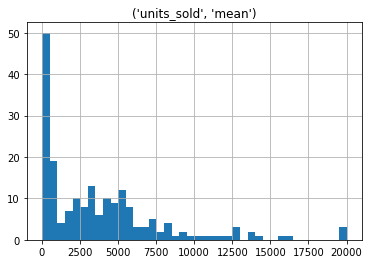

In [49]:
by_rating = df.groupby("rating").agg({"units_sold": ["mean"]})
by_rating.hist( bins = 40)
plt.show


# DI KO MASORT NA BY MEAN 

In [44]:
df.groupby("rating").agg({"units_sold": ["mean"]}).sort_values( "rating", ascending = True)

,units_sold
,mean
rating,
0.00,31.116279
1.00,66.666667
1.50,10.000000
2.00,64.000000
2.25,10.000000
...,...
4.75,52.500000
4.80,10.000000


**Question**: Visualize the relationship between the product rating and product sales

**Question**: Find out which product tags are the most effective in regards to unit sold per product 

In [23]:
df['tags'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Summer,Fashion,womenunderwearsuit,printedpajam...
1       Mini,womens dresses,Summer,Patchwork,fashion d...
2       Summer,cardigan,women beachwear,chiffon,Sexy w...
3       Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...
4       Summer,Plus Size,Lace,Casual pants,Bottom,pant...
                              ...                        
1568    bohemia,Plus Size,dandelionfloralprinted,short...
1569    Summer,Panties,Elastic,Lace,Casual pants,casua...
1570    runningshort,Beach Shorts,beachpant,menbeachsh...
1571    Summer,fashion women,Fashion,Lace,Dresses,Dres...
1572    Summer,Leggings,slim,Yoga,pants,Slim Fit,Women...
Name: tags, Length: 1539, dtype: object>

**Question**: Is there a significant difference between ad-boosted products compared to not boosted in terms of product unit sold

In [50]:
df.groupby("uses_ad_boosts").agg({"units_sold": ["mean"]})

,units_sold
,mean
uses_ad_boosts,
0,4590.008065
1,4205.767511


There is a significant difference between the ad boosted products compared to products that did not use ad_boost

**Question**: Find the confidence interval of mean rating for popular products (in terms of unit sold)


# Insights and Conclusion

With the given data analysis results, we therefore conclude that there is __________________________________